# read data

In [1]:
# load libraries
import glob
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

In [2]:
# display all columns
pd.options.display.max_columns = 50
#pd.options.display.max_rows = None

In [3]:
# get lists of multiple json files
prep_data = pd.read_json("data/A20runs.json")
prep_data.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,seed_source_timestamp,circlet_count,master_deck,relics,potions_floor_usage,damage_taken,seed_played,potions_obtained,is_trial,path_per_floor,character_chosen,items_purchased,campfire_rested,item_purchase_floors,current_hp_per_floor,gold,neow_bonus,is_prod,is_daily,chose_seed,campfire_upgraded,win_rate,timestamp,path_taken,build_version,purchased_purges,victory,max_hp_per_floor,card_choices,player_experience,relics_obtained,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed
0,"[116, 128, 128, 145, 164, 164, 199, 36, 60, 77...",57,3592,"[Strike_B, Fusion]",3387,f0e5a910-179f-4b2c-8faa-36c4b18dc596,1970-08-22 19:25:01.075911,True,"[{'data': 'Doom and Gloom', 'floor': 6.0, 'key...",NONE,0,0,"[AscendersBane, Defend_B, Defend_B, Defend_B, ...","[Snecko Eye, Boot, MealTicket, Dream Catcher, ...",[],"[{'damage': 8.0, 'enemies': '2 Louse', 'floor'...",8817479027442935808,"[{'floor': 1.0, 'key': 'SneckoOil'}, {'floor':...",False,"[M, M, ?, M, M, R, E, $, T, M, ?, R, E, M, R, ...",DEFECT,"[Loop, ClockworkSouvenir, Self Repair, Meteor ...",1,"[8, 22, 22, 30, 54, 54]","[56, 55, 55, 55, 50, 50, 25, 25, 25, 11, 11, 3...",112,BOSS_RELIC,False,False,False,6,0,2020-10-31 23:59:11,"[M, M, ?, ?, M, R, E, $, T, M, ?, R, E, M, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Steam Power', 'Tempest', 'Go...",1711065,"[{'floor': 7.0, 'key': 'Boot'}, {'floor': 9.0,...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Busted Crown', 'Astrolabe'],...","[8, 54]",False,"[1, 5, 7, 16, 18, 20, 29, 35, 42, 48, 55]",NaN,20,0.0
1,"[110, 57, 76, 88, 48, 48, 73, 22, 22, 22, 34, ...",57,2499,"[Strike_B+1, Strike_B+1]",2856,e7965be2-e720-4f70-a41f-1e102caae779,1970-08-22 19:23:51.190308,True,"[{'data': 'Sweeping Beam', 'floor': 6.0, 'key'...",NONE,0,0,"[AscendersBane, Strike_B+1, Defend_B+1, Defend...","[Calling Bell, Bag of Preparation, Cables, Win...","[56, 56, 56, 56, 56, 56, 56, 56]","[{'damage': 4.0, 'enemies': 'Jaw Worm', 'floor...",-7915356058747896832,"[{'floor': 1.0, 'key': 'DuplicationPotion'}, {...",False,"[M, ?, M, M, M, R, E, $, T, ?, M, E, E, M, R, ...",DEFECT,"[Coolheaded, OrangePellets, PreservedInsect, R...",4,"[8, 37, 37, 48, 48, 48, 48, 48, 48, 48, 54]","[60, 60, 60, 57, 35, 35, 23, 23, 23, 71, 69, 5...",57,BOSS_RELIC,False,False,False,4,0,2020-11-01 00:03:08,"[M, ?, M, M, ?, R, E, ?, T, ?, ?, E, E, ?, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 73, 7...","[{'not_picked': ['Leap', 'Redo'], 'picked': 'S...",583140,"[{'floor': 0.0, 'key': 'Bag of Preparation'}, ...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",True,"[{'not_picked': ['Sozu', 'SlaversCollar'], 'pi...","[37, 48]",False,"[1, 3, 11, 18, 21, 24, 27, 33, 35, 36, 44]",NaN,20,0.0
2,"[119, 129, 129, 149, 161, 161, 190, 210, 262, ...",57,6662,"[Strike_B, Strike_B+1]",2702,bc717009-43e1-4177-98b9-dd41fe283145,1970-08-22 19:23:51.190326,True,"[{'data': 'Darkness', 'floor': 6.0, 'key': 'SM...",NONE,0,0,"[AscendersBane, Defend_B+1, Defend_B+1, Defend...","[Nuclear Battery, Gremlin Horn, Dream Catcher,...","[56, 56]","[{'damage': 5.0, 'enemies': '2 Louse', 'floor'...",4177121344993452544,"[{'floor': 1.0, 'key': 'LiquidBronze'}, {'floo...",False,"[M, M, ?, M, M, R, E, M, T, M, M, E, ?, E, R, ...",DEFECT,"[Membership Card, Happy Flower, The Bomb, Apot...",0,"[20, 20, 20, 28, 28, 28, 37, 54]","[59, 57, 57, 60, 37, 37, 39, 45, 45, 51, 58, 6...",39,BOSS_RELIC,False,False,False,8,0,2020-11-01 00:03:26,"[M, M, ?, M, M, R, E, M, T, M, ?, E, ?, E, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Go for the Eyes', 'Sweeping ...",201155,"[{'floor': 7.0, 'key': 'Gremlin Horn'}, {'floo...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': 

In [4]:
print(prep_data['path_taken'][0])

['M', 'M', '?', '?', 'M', 'R', 'E', '$', 'T', 'M', '?', 'R', 'E', 'M', 'R', 'BOSS', 'M', '?', 'M', '?', '$', 'E', 'R', 'E', 'T', 'E', '?', 'E', '$', 'M', 'R', 'BOSS', 'M', 'M', 'M', '?', '?', 'E', 'E', 'E', 'T', '?', 'R', '?', 'E', 'M', 'R', 'BOSS', 'BOSS', 'R', '$', 'E', 'BOSS']


In [5]:
prep_data.shape

(7155, 50)

# Get path taken
- elite
- store
- monster
- rest
- random

In [6]:
# count campfire lift
def path_e(row):
    cnt = 0
    for element in row:
        if element == 'E':
            cnt = cnt + 1    
    return cnt
prep_data['path_taken_elite'] = prep_data['path_taken'].apply(path_e)

In [7]:
# count campfire lift
def path_s(row):
    cnt = 0
    for element in row:
        if element == '$':
            cnt = cnt + 1    
    return cnt
prep_data['path_taken_store'] = prep_data['path_taken'].apply(path_s)

In [8]:
# count campfire lift
def path_r(row):
    cnt = 0
    for element in row:
        if element == 'R':
            cnt = cnt + 1    
    return cnt
prep_data['path_taken_rest'] = prep_data['path_taken'].apply(path_r)

In [9]:
# count campfire lift
def path_rand(row):
    cnt = 0
    for element in row:
        if element == '?':
            cnt = cnt + 1    
    return cnt
prep_data['path_taken_random'] = prep_data['path_taken'].apply(path_rand)

In [10]:
# count campfire lift
def path_m(row):
    cnt = 0
    for element in row:
        if element == 'M':
            cnt = cnt + 1    
    return cnt
prep_data['path_taken_monster'] = prep_data['path_taken'].apply(path_m)

In [11]:
# count campfire lift
def path_t(row):
    cnt = 0
    for element in row:
        if element == 'T':
            cnt = cnt + 1    
    return cnt
prep_data['path_taken_treasure'] = prep_data['path_taken'].apply(path_t)

# Analytical Modelling
- to visualize path taken dataframe

In [12]:
temp = prep_data.copy()
temp['unknowns'] = temp['path_taken'].apply(path_rand)
temp['merchants'] = temp['path_taken'].apply(path_s)
temp['treasures'] = temp['path_taken'].apply(path_t)
temp['rests'] = temp['path_taken'].apply(path_r)
temp['enemies'] = temp['path_taken'].apply(path_m)
temp['elites'] = temp['path_taken'].apply(path_e)
temp[['unknowns','merchants','treasures','rests','enemies','elites']].head()

,unknowns,merchants,treasures,rests,enemies,elites
0,10,4,3,8,12,11
1,13,3,3,10,10,9
2,11,3,3,9,16,6
3,9,4,3,10,16,6
4,13,4,3,10,13,5


# Cluster Path Taken

In [13]:
paths = prep_data[['path_taken_elite', 'path_taken_store', 'path_taken_rest', 'path_taken_random', 'path_taken_monster', 'path_taken_treasure', 'character_chosen']] 
#paths.index = prep_data['character_chosen']
paths.head()

,path_taken_elite,path_taken_store,path_taken_rest,path_taken_random,path_taken_monster,path_taken_treasure,character_chosen
0,11,4,8,10,12,3,DEFECT
1,9,3,10,13,10,3,DEFECT
2,6,3,9,11,16,3,DEFECT
3,6,4,10,9,16,3,THE_SILENT
4,5,4,10,13,13,3,THE_SILENT


In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

# A list holds the SSE values for each k
sse = []
sh = []
ch = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    # wsse
    kmeans.fit(paths.iloc[:,0:-1])
    sse.append(kmeans.inertia_)
    # ch score
    if k == 1: # skips k = 1 to prevent error
        continue
    labels = kmeans.labels_
    sh.append(metrics.silhouette_score(paths.iloc[:,0:-1], labels, metric = 'euclidean'))
    ch.append(metrics.calinski_harabasz_score(paths.iloc[:,0:-1], labels))

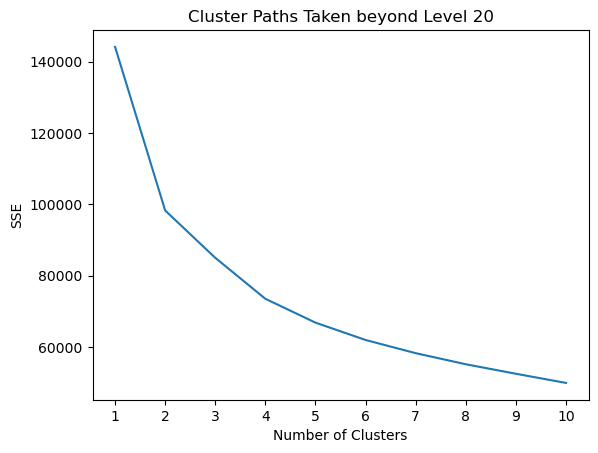

In [15]:
plt.style.use('default')

lvl = 20

fig, ax = plt.subplots()
ax.plot(range(1, 11), sse)

ax.set_xticks(range(1, 11))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("SSE")
ax.set_title('Cluster Paths Taken beyond Level {}'.format(lvl))
plt.show()

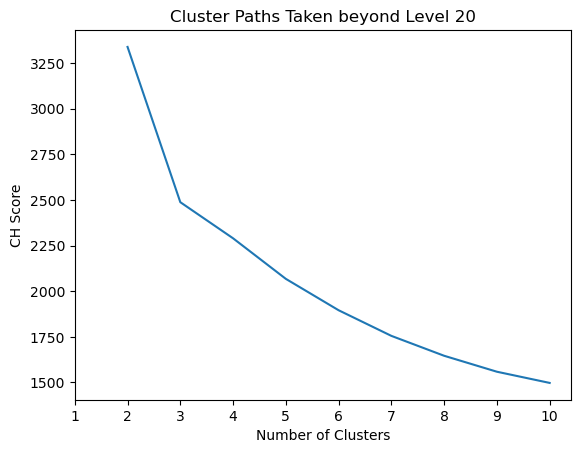

In [16]:
plt.style.use('default')

lvl = 20

fig, ax = plt.subplots()
ax.plot(range(2, 11), ch)

ax.set_xticks(range(1, 11))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("CH Score")
ax.set_title('Cluster Paths Taken beyond Level {}'.format(lvl))
plt.show()

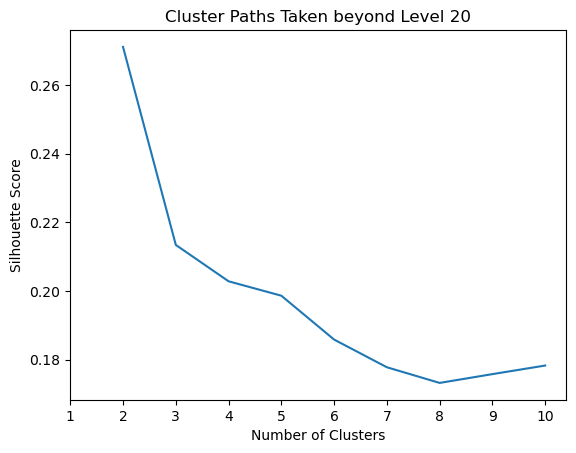

In [17]:
plt.style.use('default')

lvl = 20

fig, ax = plt.subplots()
ax.plot(range(2, 11), sh)

ax.set_xticks(range(1, 11))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.set_title('Cluster Paths Taken beyond Level {}'.format(lvl))
plt.show()

In [18]:
paths.head()

,path_taken_elite,path_taken_store,path_taken_rest,path_taken_random,path_taken_monster,path_taken_treasure,character_chosen
0,11,4,8,10,12,3,DEFECT
1,9,3,10,13,10,3,DEFECT
2,6,3,9,11,16,3,DEFECT
3,6,4,10,9,16,3,THE_SILENT
4,5,4,10,13,13,3,THE_SILENT


**2 is the optimal number of clusters.** Thus, there is 2 strategy to win STS Ascension Runs

In [19]:
kmeans = KMeans(n_clusters = 2, random_state= 123)
paths['cluster'] = kmeans.fit_predict(paths.iloc[:,0:-1])

<ipython-input-19-cd7cbf75f0fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths['cluster'] = kmeans.fit_predict(paths.iloc[:,0:-1])


In [20]:
paths.head()

,path_taken_elite,path_taken_store,path_taken_rest,path_taken_random,path_taken_monster,path_taken_treasure,character_chosen,cluster
0,11,4,8,10,12,3,DEFECT,0
1,9,3,10,13,10,3,DEFECT,1
2,6,3,9,11,16,3,DEFECT,0
3,6,4,10,9,16,3,THE_SILENT,0
4,5,4,10,13,13,3,THE_SILENT,1


In [21]:
paths.groupby('cluster').size()

cluster
0    3492
1    3663
dtype: int64

In [22]:
# We can just extend this dictionary to aggregate by multiple functions or multiple columns.
paths.groupby("cluster").agg({"path_taken_elite":['mean', 'std'],
                              "path_taken_store":['mean', 'std'],
                              "path_taken_rest":['mean', 'std'],
                              "path_taken_random":['mean', 'std'],
                              "path_taken_monster":['mean', 'std'],
                              "path_taken_treasure":['mean', 'std'],
                              "cluster": ['count']})

path_taken_elite           path_taken_store           path_taken_rest  \
                    mean       std             mean       std            mean   
cluster                                                                         
0               8.282646  1.919613         4.227377  1.352662        9.402635   
1               8.233961  1.876185         4.177996  1.306826        9.351624   

                  path_taken_random           path_taken_monster            \
              std              mean       std               mean       std   
cluster                                                                      
0        1.622131          8.995704  1.710745          14.132302  1.764158   
1        1.596103         12.628993  1.726745          10.605788  1.590589   

        path_taken_treasure           cluster  
                       mean       std   count  
cluster                                        
0                  3.007732  0.129772    3492  
1                  3.003549  0.075644    3663

In [23]:
paths.groupby(["character_chosen","cluster"]).agg({"cluster": ['count']})

cluster
                           count
character_chosen cluster        
DEFECT           0           559
                 1           645
IRONCLAD         0          1372
                 1          1276
THE_SILENT       0           716
                 1           875
WATCHER          0           845
                 1           867

In [24]:
paths.groupby("cluster").quantile([0.1, 0.5, 0.9])

path_taken_elite  path_taken_store  path_taken_rest  \
cluster                                                            
0       0.1               6.0               3.0              7.0   
        0.5               8.0               4.0              9.0   
        0.9              11.0               6.0             11.0   
1       0.1               6.0               3.0              7.0   
        0.5               8.0               4.0              9.0   
        0.9              10.0               6.0             11.0   

             path_taken_random  path_taken_monster  path_taken_treasure  
cluster                                                                  
0       0.1                7.0                12.0                  3.0  
        0.5                9.0                14.0                  3.0  
        0.9               11.0                16.0                  3.0  
1       0.1               11.0                 9.0                  3.0  
        0.5               12.0                11.0                  3.0  
        0.9               15.0                13.0                  3.0

In [25]:
paths.quantile([0.1, 0.5, 0.9])

,path_taken_elite,path_taken_store,path_taken_rest,path_taken_random,path_taken_monster,path_taken_treasure,cluster
0.1,6.0,3.0,7.0,8.0,9.0,3.0,0.0
0.5,8.0,4.0,9.0,11.0,12.0,3.0,1.0
0.9,11.0,6.0,11.0,14.0,15.0,3.0,1.0


# Plot Functions

In [26]:
def plot_hist(df, fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
              xlab = "Number of Elite Fights", ylab = "Run Count",
              title = "Elites | Path Taken", title_y = 1.15, title_x = -0.16, title_col = 'black', title_size = 18,
              subtit = "Ideal No. of Elites: 7-10", subtit_y = 1650, subtit_x = -2.59, subtit_size = 12, subtit_col = 'black',
              ax_col = 'silver', savfig = "img/path_elites.png"):
    #df 

    plt.style.use('default')

    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    ax.hist(df, bins=np.arange(df.min(), df.max()+1)-0.5, color = hist_col, edgecolor = edge_col)
    ax.set_xticks(np.arange(0, df.max()+1, 1))

    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab, loc = 'top')

    # modify title fonts and location
    ax.set_title(title, loc = 'left', y = title_y, x = title_x, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  title_col,
                                    'weight': 'bold',
                                    'size': title_size
                                    })

    # add subtitle text (very manual on x y coordinate)
    ax.text(s = subtit, y = subtit_y, x = subtit_x, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  subtit_col,
                                    'size': subtit_size
                                    }) 


    # remove spines top and right
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # remove xticks
    ax.xaxis.set_ticks_position('none') 

    # change color of axis, ticks
    ax_tick_col = ax_col
    ax.spines['bottom'].set_color(ax_tick_col)
    ax.spines['left'].set_color(ax_tick_col)

    ax.xaxis.label.set_color(ax_tick_col)
    ax.yaxis.label.set_color(ax_tick_col)
    ax.tick_params(axis='y', colors= ax_tick_col)
    ax.tick_params(axis='x', colors= ax_tick_col)


    plt.tight_layout()

    plt.show()
    
    fig.savefig(savfig)
    

In [27]:
def plot_hist_2clus(df_1st, df_2nd, df,
                    df_1st_col = 'black', df_2nd_col = 'blue',
                  fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
                  xlab = "Number of Unknowns Taken", ylab = "Run Count",
                  title = "Unknowns | Path Taken", title_y = 1.15, title_x = -0.16, title_col = 'black', title_size = 18,
                  df_1st_s = "Ideal No. of Unknowns: 7-10", df_1st_y = 1010, df_1st_x = -2.59, df_1st_size = 12,
                  df_2nd_s = "Ideal No. of Unknowns: 7-10", df_2nd_y = 1010, df_2nd_x = 12.59, df_2nd_size = 12,
                  ax_col = 'silver', savfig = "img/path_random_cluster.png"):
        #df 

    plt.style.use('default')

    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    ax.hist([df_1st, df_2nd], bins=np.arange(df.min(), df.max()+1)-0.5, edgecolor = edge_col, color = [df_1st_col, df_2nd_col])
    ax.set_xticks(np.arange(0, df.max()+1, 1))

    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab, loc = 'top')

    # modify title fonts and location
    ax.set_title(title, loc = 'left', y = title_y, x = title_x, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  title_col,
                                    'weight': 'bold',
                                    'size': title_size
                                    })

    # add subtitle text (very manual on x y coordinate)
    ax.text(s = df_1st_s, y = df_1st_y, x = df_1st_x, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  df_1st_col,
                                    'size': df_1st_size
                                    }) 
    
    # add subtitle text (very manual on x y coordinate)
    ax.text(s = df_2nd_s, y = df_2nd_y, x = df_2nd_x, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  df_2nd_col,
                                    'size': df_2nd_size
                                    }) 


    # remove spines top and right
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # remove xticks
    ax.xaxis.set_ticks_position('none') 

    # change color of axis, ticks
    ax_tick_col = ax_col
    ax.spines['bottom'].set_color(ax_tick_col)
    ax.spines['left'].set_color(ax_tick_col)

    ax.xaxis.label.set_color(ax_tick_col)
    ax.yaxis.label.set_color(ax_tick_col)
    ax.tick_params(axis='y', colors= ax_tick_col)
    ax.tick_params(axis='x', colors= ax_tick_col)


    plt.tight_layout()

    plt.show()
    
    fig.savefig(savfig)
    

# Plot Output

### Elite Paths Taken

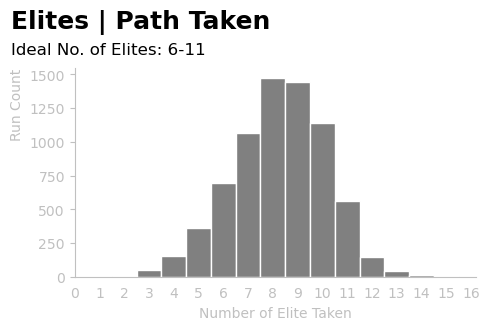

In [28]:
plot_hist(prep_data["path_taken_elite"], fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
          xlab = "Number of Elite Taken", ylab = "Run Count",
          title = "Elites | Path Taken", title_y = 1.15, title_x = -0.16, title_col = 'black', title_size = 18,
          subtit = "Ideal No. of Elites: 6-11", subtit_y = 1650, subtit_x = -2.59, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_elites.png")

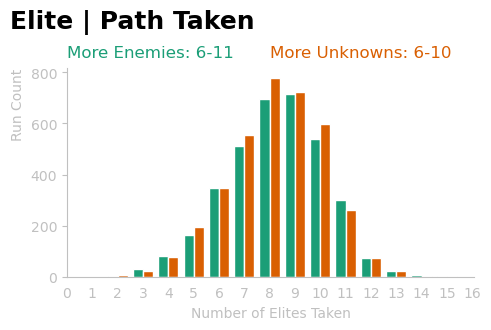

In [29]:
plot_hist_2clus(df_1st = paths["path_taken_elite"].loc[paths["cluster"] == 0], 
                df_2nd = paths["path_taken_elite"].loc[paths["cluster"] == 1],
                df = prep_data["path_taken_elite"],
                df_1st_col = sns.color_palette("Dark2", 8)[0], df_2nd_col = sns.color_palette("Dark2", 8)[1],
                fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
                xlab = "Number of Elites Taken", ylab = "Run Count",
                title = "Elite | Path Taken", title_y = 1.15, title_x = -0.14, title_col = 'black', title_size = 18,
                df_1st_s = "More Enemies: 6-11", df_1st_y = 860, df_1st_x = 0, df_1st_size = 12,
                df_2nd_s = "More Unknowns: 6-10", df_2nd_y = 860, df_2nd_x = 8, df_2nd_size = 12,
                ax_col = 'silver', savfig = "img/path_elites_cluster.png")

### Store Paths Taken

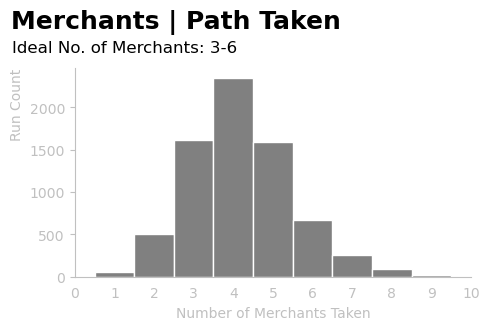

In [30]:
plot_hist(prep_data["path_taken_store"], fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
          xlab = "Number of Merchants Taken", ylab = "Run Count",
          title = "Merchants | Path Taken", title_y = 1.15, title_x = -0.16, title_col = 'black', title_size = 18,
          subtit = "Ideal No. of Merchants: 3-6", subtit_y = 2650, subtit_x = -1.59, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_stores.png")

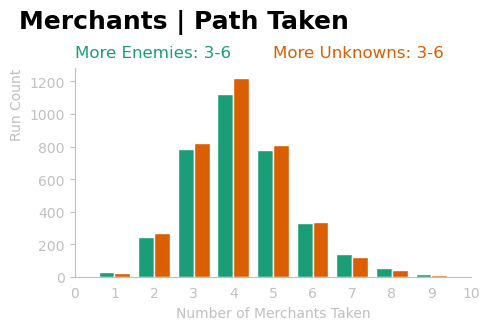

In [31]:
plot_hist_2clus(df_1st = paths["path_taken_store"].loc[paths["cluster"] == 0], 
                df_2nd = paths["path_taken_store"].loc[paths["cluster"] == 1],
                df = prep_data["path_taken_store"],
                df_1st_col = sns.color_palette("Dark2", 8)[0], df_2nd_col = sns.color_palette("Dark2", 8)[1],
                fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
                xlab = "Number of Merchants Taken", ylab = "Run Count",
                title = "Merchants | Path Taken", title_y = 1.15, title_x = -0.14, title_col = 'black', title_size = 18,
                df_1st_s = "More Enemies: 3-6", df_1st_y = 1350, df_1st_x = 0, df_1st_size = 12,
                df_2nd_s = "More Unknowns: 3-6", df_2nd_y = 1350, df_2nd_x = 5, df_2nd_size = 12,
                ax_col = 'silver', savfig = "img/path_stores_cluster.png")

### Campfire Paths Taken (Rest)

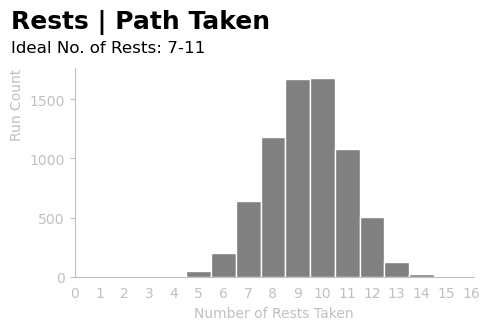

In [32]:
plot_hist(df = prep_data["path_taken_rest"], fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
          xlab = "Number of Rests Taken", ylab = "Run Count",
          title = "Rests | Path Taken", title_y = 1.15, title_x = -0.16, title_col = 'black', title_size = 18,
          subtit = "Ideal No. of Rests: 7-11", subtit_y = 1900, subtit_x = -2.59, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_campfires.png")

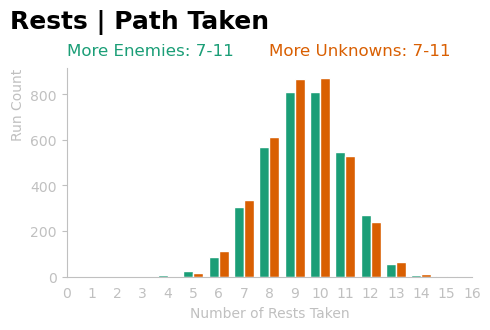

In [33]:
plot_hist_2clus(df_1st = paths["path_taken_rest"].loc[paths["cluster"] == 0], 
                df_2nd = paths["path_taken_rest"].loc[paths["cluster"] == 1],
                df = prep_data["path_taken_rest"],
                df_1st_col = sns.color_palette("Dark2", 8)[0], df_2nd_col = sns.color_palette("Dark2", 8)[1],
                fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
                xlab = "Number of Rests Taken", ylab = "Run Count",
                title = "Rests | Path Taken", title_y = 1.15, title_x = -0.14, title_col = 'black', title_size = 18,
                df_1st_s = "More Enemies: 7-11", df_1st_y = 970, df_1st_x = 0, df_1st_size = 12,
                df_2nd_s = "More Unknowns: 7-11", df_2nd_y = 970, df_2nd_x = 8, df_2nd_size = 12,
                ax_col = 'silver', savfig = "img/path_campfires_cluster.png")

### Random Paths Taken

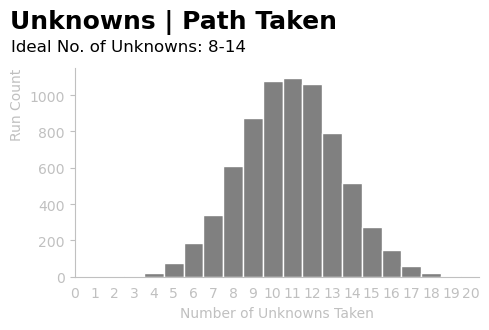

In [34]:
plot_hist(df = prep_data["path_taken_random"], fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
          xlab = "Number of Unknowns Taken", ylab = "Run Count",
          title = "Unknowns | Path Taken", title_y = 1.15, title_x = -0.16, title_col = 'black', title_size = 18,
          subtit = "Ideal No. of Unknowns: 8-14", subtit_y = 1240, subtit_x = -3.2, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_random.png")

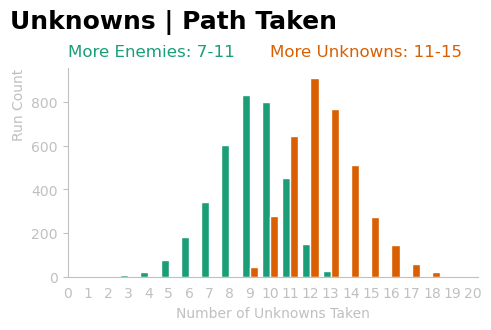

In [35]:
plot_hist_2clus(df_1st = paths["path_taken_random"].loc[paths["cluster"] == 0], 
                df_2nd = paths["path_taken_random"].loc[paths["cluster"] == 1],
                df = prep_data["path_taken_random"],
                df_1st_col = sns.color_palette("Dark2", 8)[0], df_2nd_col = sns.color_palette("Dark2", 8)[1],
                fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
                xlab = "Number of Unknowns Taken", ylab = "Run Count",
                title = "Unknowns | Path Taken", title_y = 1.15, title_x = -0.14, title_col = 'black', title_size = 18,
                df_1st_s = "More Enemies: 7-11", df_1st_y = 1010, df_1st_x = 0, df_1st_size = 12,
                df_2nd_s = "More Unknowns: 11-15", df_2nd_y = 1010, df_2nd_x = 10, df_2nd_size = 12,
                ax_col = 'silver', savfig = "img/path_random_cluster.png")

### Monster Paths Taken

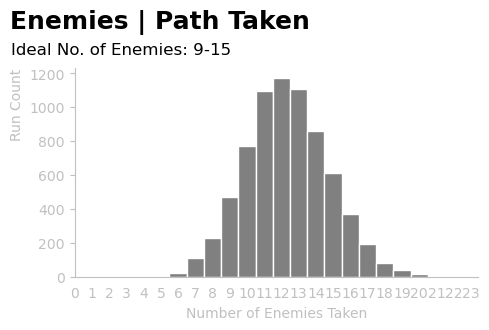

In [36]:
plot_hist(df = prep_data["path_taken_monster"], fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
          xlab = "Number of Enemies Taken", ylab = "Run Count",
          title = "Enemies | Path Taken", title_y = 1.15, title_x = -0.16, title_col = 'black', title_size = 18,
          subtit = "Ideal No. of Enemies: 9-15", subtit_y = 1310, subtit_x = -3.7, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_monsters.png")

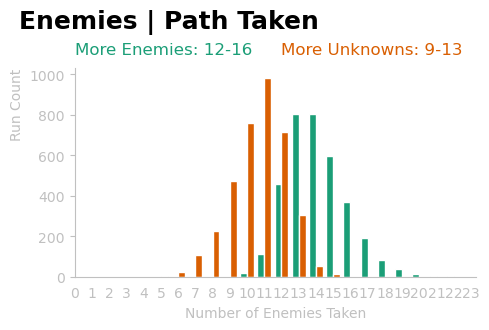

In [37]:
plot_hist_2clus(df_1st = paths["path_taken_monster"].loc[paths["cluster"] == 0], 
                df_2nd = paths["path_taken_monster"].loc[paths["cluster"] == 1],
                df = prep_data["path_taken_monster"],
                df_1st_col = sns.color_palette("Dark2", 8)[0], df_2nd_col = sns.color_palette("Dark2", 8)[1],
                fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
                xlab = "Number of Enemies Taken", ylab = "Run Count",
                title = "Enemies | Path Taken", title_y = 1.15, title_x = -0.14, title_col = 'black', title_size = 18,
                df_1st_s = "More Enemies: 12-16", df_1st_y = 1100, df_1st_x = 0, df_1st_size = 12,
                df_2nd_s = "More Unknowns: 9-13", df_2nd_y = 1100, df_2nd_x = 12, df_2nd_size = 12,
                ax_col = 'silver', savfig = "img/path_monsters_cluster.png")

### Treasure Paths Taken

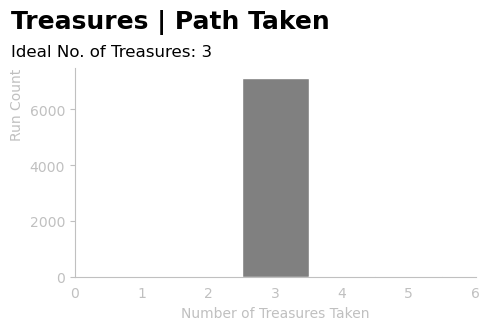

In [38]:
plot_hist(df = prep_data["path_taken_treasure"], fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
          xlab = "Number of Treasures Taken", ylab = "Run Count",
          title = "Treasures | Path Taken", title_y = 1.15, title_x = -0.16, title_col = 'black', title_size = 18,
          subtit = "Ideal No. of Treasures: 3", subtit_y = 7900, subtit_x = -0.95, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_treasures.png")

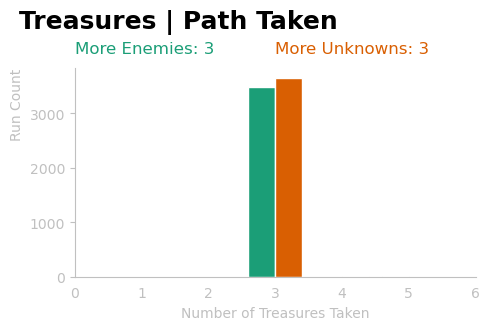

In [39]:
plot_hist_2clus(df_1st = paths["path_taken_treasure"].loc[paths["cluster"] == 0], 
                df_2nd = paths["path_taken_treasure"].loc[paths["cluster"] == 1],
                df = prep_data["path_taken_treasure"],
                df_1st_col = sns.color_palette("Dark2", 8)[0], df_2nd_col = sns.color_palette("Dark2", 8)[1],
                fig_w = 5, fig_h = 3.5, hist_col = 'grey', edge_col = 'white',
                xlab = "Number of Treasures Taken", ylab = "Run Count",
                title = "Treasures | Path Taken", title_y = 1.15, title_x = -0.14, title_col = 'black', title_size = 18,
                df_1st_s = "More Enemies: 3", df_1st_y = 4100, df_1st_x = 0, df_1st_size = 12,
                df_2nd_s = "More Unknowns: 3", df_2nd_y = 4100, df_2nd_x = 3, df_2nd_size = 12,
                ax_col = 'silver', savfig = "img/path_treasures_cluster.png")

# Basic Cluster Count Overall

In [40]:
paths_cluster_all = paths.groupby('cluster').size()
paths_cluster_all.index = ['More\nEnemies\nPath', 'More\nUnknowns\nPath']

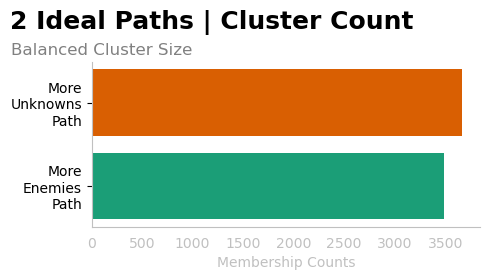

In [41]:
fig, ax = plt.subplots(figsize=(5, 3))
paths
ax.barh(paths_cluster_all.index, paths_cluster_all, color = [sns.color_palette("Dark2", 8)[0], sns.color_palette("Dark2", 8)[1]])
ax.set_title("2 Ideal Paths | Cluster Count", y = 1.15, x = -0.21,
                                                loc = 'left', fontdict = {'family': 'sans-serif',
                                                'color':  'black',
                                                'weight': 'bold',
                                                'size': 18
                                                })
ax.set_xlabel('Membership Counts')


ax.text(s = "Balanced Cluster Size", y = 1.58, x = -800, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  'grey',
                                    'size': 12
                                    }) 

# remove spines top and right
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# remove xticks
ax.xaxis.set_ticks_position('none') 

# change color of axis, ticks
ax_tick_col = 'silver'
ax.spines['bottom'].set_color(ax_tick_col)
ax.spines['left'].set_color(ax_tick_col)

ax.xaxis.label.set_color(ax_tick_col)
ax.yaxis.label.set_color(ax_tick_col)
#ax.tick_params(axis='y', colors= ax_tick_col)
ax.tick_params(axis='x', colors= ax_tick_col)



plt.tight_layout()

plt.show()

In [42]:
fig.savefig('img/path_cluster_size.png')

# Character Cluster Count

In [43]:
paths.head()

,path_taken_elite,path_taken_store,path_taken_rest,path_taken_random,path_taken_monster,path_taken_treasure,character_chosen,cluster
0,11,4,8,10,12,3,DEFECT,0
1,9,3,10,13,10,3,DEFECT,1
2,6,3,9,11,16,3,DEFECT,0
3,6,4,10,9,16,3,THE_SILENT,0
4,5,4,10,13,13,3,THE_SILENT,1


In [44]:
paths_cluster_char = paths.groupby(['character_chosen','cluster']).size()
paths_cluster_char =paths_cluster_char.reindex(["IRONCLAD", "THE_SILENT", "DEFECT", "WATCHER"], level = 0)
#paths_cluster_all.index = ['More\nEnemies\nPath', 'More\nUnknowns\nPath']

In [45]:
paths_cluster_char

character_chosen  cluster
IRONCLAD          0          1372
                  1          1276
THE_SILENT        0           716
                  1           875
DEFECT            0           559
                  1           645
WATCHER           0           845
                  1           867
dtype: int64

In [46]:
paths_cluster_char = paths_cluster_char.reset_index().rename(columns={0: 'count'})
paths_cluster_char

,character_chosen,cluster,count
0,IRONCLAD,0,1372
1,IRONCLAD,1,1276
2,THE_SILENT,0,716
3,THE_SILENT,1,875
4,DEFECT,0,559
5,DEFECT,1,645
6,WATCHER,0,845
7,WATCHER,1,867


In [47]:
df_1st = paths_cluster_char.loc[paths_cluster_char["cluster"] == 0] 
df_1st.index = df_1st['character_chosen']
df_1st = df_1st['count']
df_1st

character_chosen
IRONCLAD      1372
THE_SILENT     716
DEFECT         559
WATCHER        845
Name: count, dtype: int64

In [48]:
df_2nd = paths_cluster_char.loc[paths_cluster_char["cluster"] == 1]
df_2nd.index = df_2nd['character_chosen']
df_2nd = df_2nd['count']
df_2nd

character_chosen
IRONCLAD      1276
THE_SILENT     875
DEFECT         645
WATCHER        867
Name: count, dtype: int64

In [49]:
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)

In [50]:
df_1st.values

array([1372,  716,  559,  845], dtype=int64)

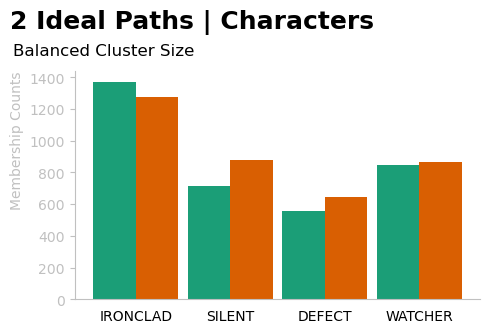

In [51]:
fig, ax = plt.subplots(figsize=(5, 3.5))
subcategorybar(['IRONCLAD', 'SILENT', 'DEFECT', 'WATCHER'],  # responses
               [df_1st.values, df_2nd.values],  # pre- and post- responses distribution
               [sns.color_palette("Dark2", 8)[0], sns.color_palette("Dark2", 8)[1]])


ax.set_ylabel('Membership Counts', loc = 'top')

ax.set_title("2 Ideal Paths | Characters", y = 1.15, x = -0.16,
                                                loc = 'left', fontdict = {'family': 'sans-serif',
                                                'color':  'black',
                                                'weight': 'bold',
                                                'size': 18
                                                })

ax.text(s = "Balanced Cluster Size", y = 1540, x = -1.3, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  'black',
                                    'size': 12
                                    }) 


# remove spines top and right
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# remove xticks
ax.xaxis.set_ticks_position('none') 

# change color of axis, ticks
ax_tick_col = 'silver'
ax.spines['bottom'].set_color(ax_tick_col)
ax.spines['left'].set_color(ax_tick_col)

ax.xaxis.label.set_color(ax_tick_col)
ax.yaxis.label.set_color(ax_tick_col)
ax.tick_params(axis='y', colors= ax_tick_col)
#ax.tick_params(axis='x', colors= ax_tick_col)



plt.tight_layout()

plt.show()

In [52]:
fig.savefig('img/path_cluster_char.png')

# Cluster Fig Random

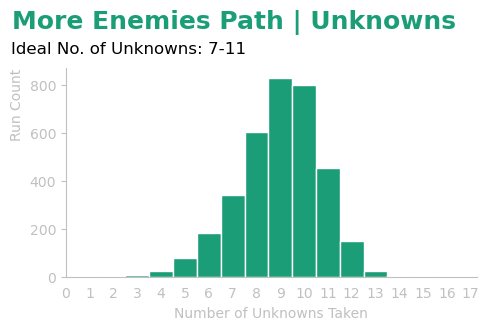

In [53]:
plot_hist(df = prep_data["path_taken_random"].loc[paths["cluster"] == 0], 
          fig_w = 5, fig_h = 3.5, hist_col = sns.color_palette("Dark2", 8)[0], edge_col = 'white',
          xlab = "Number of Unknowns Taken", ylab = "Run Count",
          title = "More Enemies Path | Unknowns", title_y = 1.15, title_x = -0.13, title_col = sns.color_palette("Dark2", 8)[0], title_size = 18,
          subtit = "Ideal No. of Unknowns: 7-11", subtit_y = 930, subtit_x = -2.3, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_random_0.png")

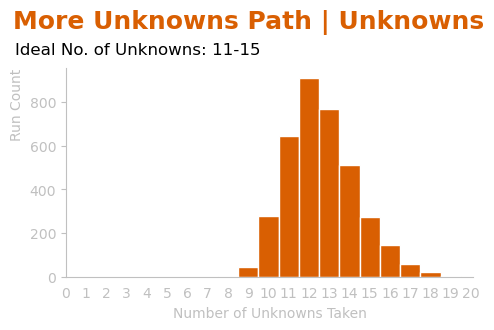

In [54]:
plot_hist(df = prep_data["path_taken_random"].loc[paths["cluster"] == 1], 
          fig_w = 5, fig_h = 3.5, hist_col = sns.color_palette("Dark2", 8)[1], edge_col = 'white',
          xlab = "Number of Unknowns Taken", ylab = "Run Count",
          title = "More Unknowns Path | Unknowns", title_y = 1.15, title_x = -0.13, title_col = sns.color_palette("Dark2", 8)[1], title_size = 18,
          subtit = "Ideal No. of Unknowns: 11-15", subtit_y = 1020, subtit_x = -2.5, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_random_1.png")

# Cluster Fig Enemies

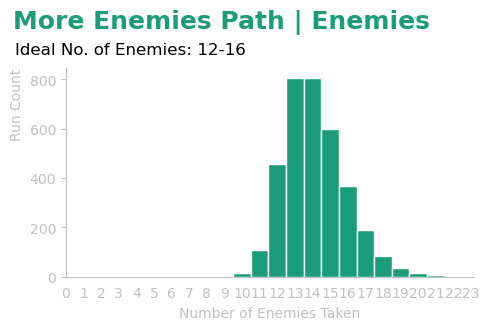

In [55]:
plot_hist(df = prep_data["path_taken_monster"].loc[paths["cluster"] == 0], 
          fig_w = 5, fig_h = 3.5, hist_col = sns.color_palette("Dark2", 8)[0], edge_col = 'white',
          xlab = "Number of Enemies Taken", ylab = "Run Count",
          title = "More Enemies Path | Enemies", title_y = 1.15, title_x = -0.13, title_col = sns.color_palette("Dark2", 8)[0], title_size = 18,
          subtit = "Ideal No. of Enemies: 12-16", subtit_y = 900, subtit_x = -2.9, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_monster_0.png")

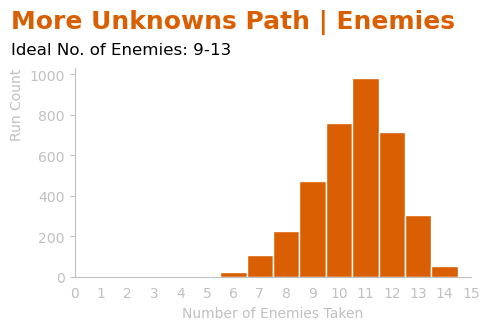

In [56]:
plot_hist(df = prep_data["path_taken_monster"].loc[paths["cluster"] == 1], 
          fig_w = 5, fig_h = 3.5, hist_col = sns.color_palette("Dark2", 8)[1], edge_col = 'white',
          xlab = "Number of Enemies Taken", ylab = "Run Count",
          title = "More Unknowns Path | Enemies", title_y = 1.15, title_x = -0.16, title_col = sns.color_palette("Dark2", 8)[1], title_size = 18,
          subtit = "Ideal No. of Enemies: 9-13", subtit_y = 1100, subtit_x = -2.4, subtit_size = 12, subtit_col = 'black',
          ax_col = 'silver', savfig = "img/path_monster_1.png")

# View Sample Results per Cluster

1 ~ Monster

0 ~ Random

In [57]:
paths.iloc[:, -1].head(6)

0    0
1    1
2    0
3    0
4    1
5    1
Name: cluster, dtype: int32

## Monster Group (1) 

In [58]:
idx_1 = paths.index[paths['cluster'] == 1].tolist()[10:14]
idx_1

[15, 18, 20, 23]

In [59]:
for i in idx_1:
    print(i)
    print(prep_data['path_taken'][i])

15
['M', '?', '?', 'M', 'M', 'E', '$', 'R', 'T', 'M', 'M', 'M', 'R', 'E', 'R', 'BOSS', 'M', '?', '?', '$', 'M', 'E', 'R', 'E', 'T', 'M', 'M', '?', 'R', '?', 'R', 'BOSS', 'M', '?', '?', '?', '$', 'E', 'R', 'E', 'T', 'R', '?', '$', 'M', '?', 'R', 'BOSS', 'BOSS', 'R', '$', 'E', 'BOSS']
18
['M', 'M', '$', 'M', '?', 'E', 'M', 'E', 'T', '$', 'R', '?', 'M', '?', 'R', 'BOSS', 'M', '?', 'M', '$', '?', 'R', 'E', 'M', 'T', 'M', 'R', '?', '$', 'M', 'R', 'BOSS', 'M', '?', '?', '?', '?', 'E', '$', 'E', 'T', '$', 'M', '?', 'E', '?', 'R', 'BOSS', 'BOSS', 'R', '$', 'E', 'BOSS']
20
['M', '$', 'M', '?', '?', 'E', 'R', '$', 'T', 'M', '?', 'E', '?', 'E', 'R', 'BOSS', 'M', '$', '?', '?', '?', 'R', 'E', 'M', 'T', 'R', '?', 'E', '?', '$', 'R', 'BOSS', 'M', '?', 'M', '?', '?', 'M', 'R', 'E', 'T', 'R', 'E', 'M', '?', '$', 'R', 'BOSS', 'BOSS', 'R', '$', 'E', 'BOSS']
23
['M', '?', '?', '?', 'M', 'R', 'E', '$', 'T', 'M', 'E', 'R', 'E', '?', 'R', 'BOSS', 'M', '?', 'M', '$', '?', 'R', 'E', 'R', 'T', 'E', 'M', 'M', '

## Random Group (0) 

In [60]:
idx_0 = paths.index[paths['cluster'] == 0].tolist()[10:14]
idx_0

[25, 26, 27, 28]

In [61]:
for i in idx_0:
    print(i)
    print(prep_data['path_taken'][i])

25
['M', '?', '?', '?', 'M', 'R', 'M', '?', 'T', '?', '?', 'M', 'R', 'M', 'R', 'BOSS', 'M', '?', '?', 'M', 'M', 'R', 'E', 'R', 'T', 'M', 'E', '?', 'M', '$', 'R', 'BOSS', 'M', '?', '$', 'M', 'M', 'R', 'E', '?', 'T', 'M', '$', 'M', 'E', '?', 'R', 'BOSS', 'BOSS', 'R', '$', 'E', 'BOSS']
26
['M', '?', '$', 'M', '?', 'R', 'E', 'R', 'T', 'R', '?', '?', 'E', 'M', 'R', 'BOSS', 'M', '?', 'M', 'M', 'M', 'E', 'R', 'M', 'T', '?', 'R', 'E', 'M', '$', 'R', 'BOSS', 'M', 'M', '?', '$', 'M', 'M', 'E', 'R', 'T', '?', '?', 'E', 'R', 'E', 'R', 'BOSS', 'BOSS', 'R', '$', 'E', 'BOSS']
27
['M', '?', '?', 'M', '?', 'E', 'R', '$', 'T', 'R', 'M', '?', 'E', 'M', 'R', 'BOSS', 'M', 'M', '$', '?', 'M', 'E', 'R', 'E', 'T', 'E', '?', 'R', '$', 'M', 'R', 'BOSS', 'M', 'M', '?', 'M', 'M', 'R', 'E', '?', 'T', 'E', 'M', 'M', '$', '?', 'R', 'BOSS', 'BOSS', 'R', '$', 'E', 'BOSS']
28
['M', 'M', 'M', '?', 'M', 'E', 'R', 'E', 'T', 'R', 'E', 'M', 'E', 'M', 'R', 'BOSS', 'M', '$', '?', 'M', 'M', 'E', 'R', '?', 'T', 'E', '$', 'E', '